# Neural Network Classification Model

In [278]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

print('tensorflow ',tf.__version__)
print('numpy ',np.__version__)
print('matplotlib ',matplotlib.__version__)
print('pandas ',pd.__version__)
print('sklearn', sklearn.__version__)

tensorflow  2.8.0
numpy  1.22.3
matplotlib  3.4.3
pandas  1.3.4
sklearn 1.0.2


## Binary Classification

In [279]:
# Create sample data
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=.05, random_state=42)
print(X.shape, y.shape,'\n', X[:5], '\n', y[:5])

(1000, 2) (1000,) 
 [[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]] 
 [1 1 1 1 0]


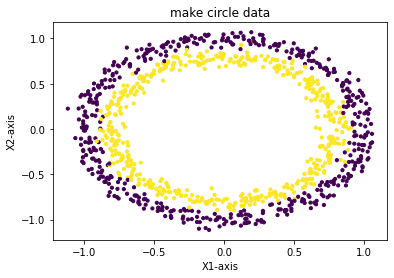

In [280]:
plt.scatter(X[:,0], X[:,1], c=y, s=10)
plt.xlabel('X1-axis')
plt.ylabel('X2-axis')
plt.title('make circle data');

### Input and Output shape
- we want 2 x to predicts 1 y 

then input shape = (2,1)<br>
and output shape = (1,)

In [281]:
X[0], y[0]

(array([0.74220688, 0.24668576]), 1)

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

X_train_norm.shape, y_train.shape

((800, 2), (800,))

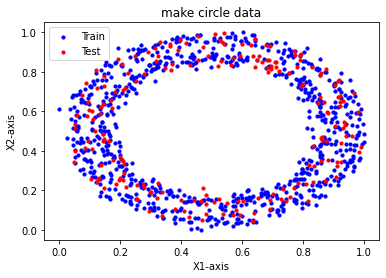

In [283]:
plt.scatter(X_train_norm[:,0], X_train_norm[:,1], c='b', s=10)
plt.scatter(X_test_norm[:,0], X_test_norm[:,1], c='r', s=10)
plt.xlabel('X1-axis')
plt.ylabel('X2-axis')
plt.legend(['Train','Test'])
plt.title('make circle data');

## Create Model

In [284]:
tf.random.set_seed(42)
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100,input_shape=(2,)),
    tf.keras.layers.Dense(100,'relu'),
    tf.keras.layers.Dense(1,)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100, verbose=0)

In [285]:
model.evaluate(X_test_norm,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

> our model perform with 50% accuracy

In [286]:
model.output_shape[1]

1

Let's plot boundary and see what this model do.

In [304]:
def plot_decision_boundary(model,scaler, X, y):
    '''
    Plots the decision boundary created by a model predicting on X
    '''

    # create a meshgrid
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, 500),
                          np.linspace(y_min, y_max, 500))
    # create new x value
    x_new = np.c_[xx.ravel(), yy.ravel()] # shape like input shape (X)
    x_new = scaler.transform(x_new) # transform scale
    
    # make prediction
    y_prob = model.predict(x_new)
    
    #check that binary or multi classification
    if model.output_shape[1] > 1 :
        print('predictions for multiclassifications')
        y_preds = np.argmax(y_prob, axis=1) 
        y_preds = np.reshape(y_preds, (xx.shape))

    else :
        print('predictions for binaryclassification')
        y_preds = np.round(y_prob) # 0 or 1
        y_preds = np.reshape(y_preds, (xx.shape))
    
    plt.contourf(xx, yy, y_preds, alpha=.4)
    plt.scatter(X[:,0], X[:,1], c=y, s=10)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


predictions for binaryclassification


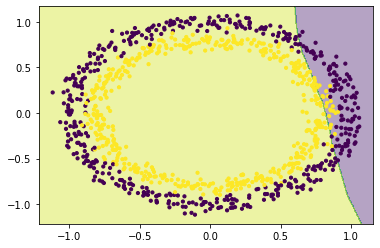

In [288]:
plot_decision_boundary(model,scaler,X,y)

> that is our model just predict linear line seperate, that why 50% accuracy

because binaryclssification must have output **sigmoid** activation, and multiclassification is **softmax**.

In [289]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

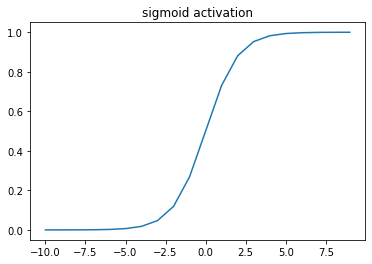

In [290]:
x = np.arange(-10,10)
plt.plot(x,sigmoid(x))
plt.title('sigmoid activation');

In [291]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100,input_shape=(2,)),
    tf.keras.layers.Dense(100,'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100, verbose=0)

In [292]:
model_2.evaluate(X_test_norm, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9250


[0.17692846059799194, 0.925000011920929]

predictions for binaryclassification


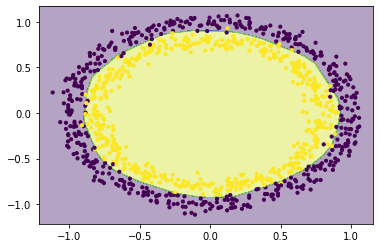

In [293]:
plot_decision_boundary(model_2,scaler,X,y)

> that's right just change activation to Sigmoid.

## Improve the model

In [294]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100,input_shape=(2,)),
    tf.keras.layers.Dense(100,'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])
lr_ = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100, verbose=0, callbacks=[lr_])

In [295]:
# Plot the learning rate versus the loss
def plot_learning_rate(history,a=10,b=20):
    '''
    lrs = initial_rate * (a** (epoch/b ) )
    '''
    learning = pd.DataFrame(history.history)['lr']
    lrs = learning[0] * (a ** (np.arange(len(learning)) / b))
    plt.figure(figsize=(10, 7))
    plt.semilogx(lrs, history.history["loss"],c='k') # we want the x-axis (learning rate) to be log scale
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("Learning rate vs. loss")
    plt.axhline(min(history.history['loss']),linestyle = '--')

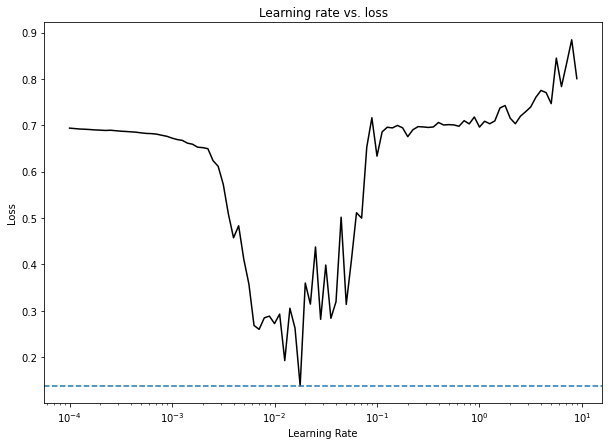

In [296]:
plot_learning_rate(history)

> learning rate about 5e-3 - 2e-2

In [297]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100,input_shape=(2,)),
    tf.keras.layers.Dense(100,'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=6e-3),
                metrics=['accuracy'])

history = model_4.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100, verbose=0)

In [298]:
model_4.evaluate(X_test_norm, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1667 - accuracy: 0.9450


[0.16672831773757935, 0.9449999928474426]

predictions for binaryclassification
predictions for binaryclassification


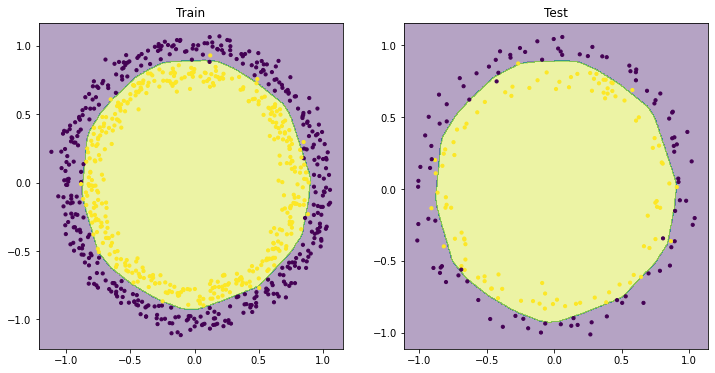

In [302]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4,scaler,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4,scaler,X_test,y_test)

## Multiclassification

In [306]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [309]:
train_data.shape, train_labels.shape, train_labels[:5]

((60000, 28, 28), (60000,), array([9, 0, 0, 3, 0], dtype=uint8))

In [350]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [359]:
def plot_sample(data,label,n):
    shuffle = np.random.permutation(len(data))[:n*n]
    data = data[shuffle]
    label = label[shuffle]

    plt.figure(figsize=(4*n,3*n))
    for i, image in enumerate(data) :
        plt.subplot(n,n,i+1)
        plt.imshow(data[i], cmap=plt.cm.binary)
        plt.title(class_names[label[i]], fontsize=14)
        plt.axis('off')

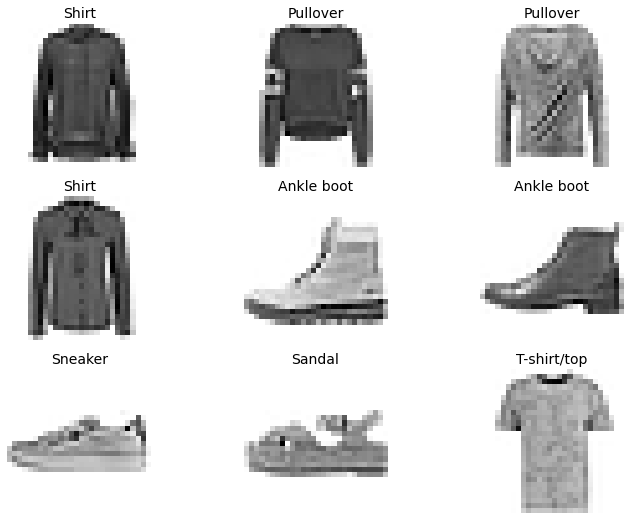

In [360]:
plot_sample(train_data,train_labels,3)

### Input and Output shape
we want 28x28 X to predict 1 y (but 0 to 9)
- input shape = (28,28)
- output shape = (10,)

In [367]:
train_data[0].shape

(28, 28)

In [378]:
train_data_norm = train_data/255.
test_data_norm = test_data/255.

## Create Model

In [386]:
tf.random.set_seed(42)

model_f1 = tf.keras.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28,28)), #flatten before go to ANN
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_f1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(), 
                 metrics=['accuracy'])

model_f1.fit(train_data_norm, train_labels, validation_data=(test_data_norm, test_labels), epochs=100, verbose=0)

> ordinal label use **SparseCategoricalCrossentropy** <br> onehot use **CategoricalCrossentropy**

In [387]:
model_f1.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5423 - accuracy: 0.8151


[0.542275071144104, 0.8151000142097473]

### Find ideal learning rate

In [389]:
tf.random.set_seed(42)

model_f2 = tf.keras.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28,28)), #flatten before go to ANN
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_f2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
                 metrics=['accuracy'])

lr_ = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
model_f2.fit(train_data_norm, train_labels, validation_data=(test_data_norm, test_labels), epochs=100, verbose=0, callbacks=[lr_])

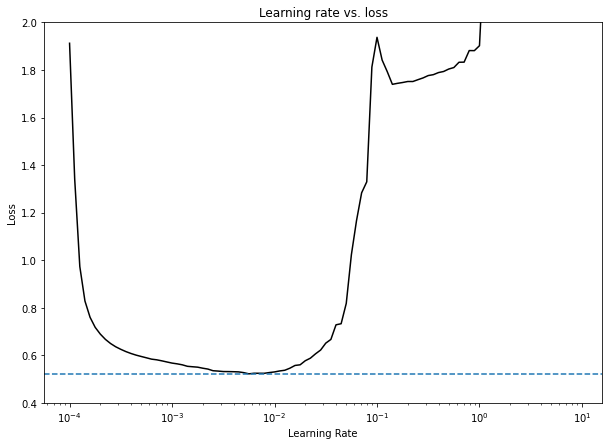

In [403]:
plot_learning_rate(model_f2.history)
plt.ylim([0.4,2]);

In [404]:
tf.random.set_seed(42)

model_f3 = tf.keras.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28,28)), #flatten before go to ANN
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_f3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=15e-4), 
                 metrics=['accuracy'])

model_f3.fit(train_data_norm, train_labels, validation_data=(test_data_norm, test_labels), epochs=100, verbose=0)

In [405]:
model_f3.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.8198


[0.5467705726623535, 0.8198000192642212]